# Business Understanding

Een gameontwikkelaar heeft ons gevraagd om te kijken wat de beste eigenschappen van een game zijn, om zo zelf een succesvolle game te kunnen maken voor de app store. Om dit makkelijker te kunnen onderzoeken, hebben we de hoofdvraag in meerdere deelvragen opgesplitst.

#### Hoofdvraag:
"Wat zijn de meest belangrijke kenmerken van games met meer dan 1 miljoen downloads?"

#### Deelvragen:
"Is er een trend in het releasejaar en gemiddelde prijs van games?"

"Wat is het aantal games per jaar gereleased?"

"Zit er een relatie tussen het aantal ratings en de lifetime van een game (release  tot laatste update)"

"Zit er een relatie tussen de extra genres en in-app aankopen?"

"Maakt grootte uit voor de ratings van de game?"

"Maakt het aantal games gereleased door de developer uit voor de ratings?"

"Welke taal krijgt de hoogste reviews?"

"Wat hebben de apps zonder rating gemeen?"



#### Yorben: 
Trend in jaar en gemiddelde prijs & ratings en lifetime van een game

# Data Understanding

* de dataset die er wordt toegeleverd is een bestand in csv formaat.
* de databron is makkelijk te benaderen vanuit python met behulp van pandas
* de databse bevat 17007 rijen en 18 kolommen
* de volgende kollommen staan in de database
    * `URL`: de url naar de game in de appstore
    * `ID`: unieke id voor de game
    * `name`: naam van de app
    * `subtitle`: alternative naam voor de app
    * `icon url`: url naar de icon van de app
    * `Avegage user rating`: de gemiddelde score van de app op de appstore
    * `Uer rating count`: het aantal ratings dat de app heeft
    * `price`: de aankoop prijs van de app
    * `In-app Purchases`: lijst met prijzen van in-app aankopen
    * `Description`: een omschrijving van de app
    * `Developper`: de uitgever van de app
    * `Age rating`: de aanbevolen minimumleeftijd (4+, 12+ ect.)
    * `Languages`: talen waarin de app beschikbaar is
    * `Size`: de groote van de app in bytes
    * `primary` Genre: de genre van de app (entertainment, strategie, ect.)
    * `Genres`: een lijst met overige genres waar binnen de app valt
    * `Original` realease date: de datum waarop de app werd uitgegeven
    * `current version release date`: de datum van de laatste update

#### Imports

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

%config IPCompleter.greedy = True  
%matplotlib inline

In [155]:
game_data = pd.read_csv("appstore_games.csv")

De data is ons gegeven in een excel bestand genaamd "appstore_games.csv". 

#### Bovenste rijen:

In [102]:
game_data.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,...,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,release_year,lifetime,Description Length,Amount of Languages,lifetime_in_years
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",...,15853568.0,Games,"Games, Strategy, Puzzle",2008-11-07,2017-05-30,2008,3126 days,1617,66,9
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",...,12328960.0,Games,"Games, Strategy, Board",2008-11-07,2018-05-17,2008,3478 days,1222,2,10
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,...,674816.0,Games,"Games, Board, Strategy",2008-11-07,2017-05-09,2008,3105 days,582,2,9
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",...,21552128.0,Games,"Games, Strategy, Puzzle",2008-07-23,2017-05-30,2008,3233 days,1675,66,9
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",...,34689024.0,Games,"Games, Strategy, Board, Education",2008-07-18,2018-07-22,2008,3656 days,2076,58,10


#### Grootte

In [77]:
print("Aantal Rijen: " + str(game_data.shape[0]))

Aantal Rijen: 17007


#### Kolommen

In [114]:
game_data.columns

Index(['URL', 'ID', 'Name', 'Subtitle', 'Icon URL', 'Average User Rating',
       'User Rating Count', 'Price', 'In-app Purchases', 'Description',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre',
       'Genres', 'Original Release Date', 'Current Version Release Date',
       'release_year', 'lifetime', 'Description Length', 'Amount of Languages',
       'lifetime_in_years'],
      dtype='object')

#### Types

In [112]:
game_data.dtypes

URL                                      object
ID                                        int64
Name                                     object
Subtitle                                 object
Icon URL                                 object
Average User Rating                     float64
User Rating Count                       float64
Price                                   float64
In-app Purchases                         object
Description                              object
Developer                                object
Age Rating                             category
Languages                                object
Size                                    float64
Primary Genre                            object
Genres                                   object
Original Release Date            datetime64[ns]
Current Version Release Date     datetime64[ns]
release_year                              int64
lifetime                        timedelta64[ns]
Description Length                      

#### Lege velden?

In [80]:
game_data.isna().sum()

URL                                 0
ID                                  0
Name                                0
Subtitle                        11746
Icon URL                            0
Average User Rating              9446
User Rating Count                9446
Price                              24
In-app Purchases                 9324
Description                         0
Developer                           0
Age Rating                          0
Languages                          60
Size                                1
Primary Genre                       0
Genres                              0
Original Release Date               0
Current Version Release Date        0
dtype: int64

#### Eigenschappen?

In [137]:
game_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,17007.0,1059613815.452696,299967589.358864,284921427.0,899654330.0,1112286228.0,1286982837.0,1475076711.0
Average User Rating,7561.0,4.060905,0.751428,1.0,3.5,4.5,4.5,5.0
User Rating Count,7561.0,3306.531279,42322.56051,5.0,12.0,46.0,309.0,3032734.0
Price,16983.0,0.813419,7.835732,0.0,0.0,0.0,0.0,179.99
Size,17006.0,115706429.886922,203647677.848144,51328.0,22950144.0,56768954.0,133027072.0,4005591040.0
release_year,17007.0,2015.671606,2.311771,2008.0,2014.0,2016.0,2017.0,2019.0
lifetime,17007,418 days 00:50:12.594813896,691 days 02:04:06.012633016,-333 days +00:00:00,0 days 00:00:00,55 days 00:00:00,581 days 00:00:00,4086 days 00:00:00
Description Length,17007.0,1049.854119,913.477716,6.0,404.0,795.0,1417.0,12925.0
Amount of Languages,17007.0,11.00147,24.647599,0.0,2.0,2.0,6.0,442.0
lifetime_in_years,17007.0,1.136297,1.911269,-1.0,0.0,0.0,2.0,11.0


# Data Preparation

#### Veld types goed maken en toevoegen

In [157]:
game_data["Original Release Date"] = pd.to_datetime(game_data["Original Release Date"])
game_data["Current Version Release Date"] = pd.to_datetime(game_data["Current Version Release Date"])
game_data["Age Rating"] = game_data["Age Rating"].astype("category")

game_data["release_year"] = game_data["Original Release Date"].dt.year
game_data["lifetime"] = game_data["Current Version Release Date"] - game_data["Original Release Date"]
game_data["Description Length"] = game_data["Description"].agg(len)

game_data["Languages"] = game_data["Languages"].fillna('')
game_data["Amount of Languages"] = game_data["Languages"].agg(len)

game_data["lifetime_in_years"] = (game_data["lifetime"].dt.days / 365).agg(round)

game_data["Amount of Languages"]

0        66
1         2
2         2
3        66
4        58
         ..
17002     2
17003     2
17004     2
17005     2
17006     6
Name: Amount of Languages, Length: 17007, dtype: int64

In [158]:
per_dev = game_data["Developer"].value_counts().to_dict()

game_data["Amount of Games per Developer"] = game_data["Developer"].map(per_dev)
game_data["Amount of Games per Developer"]

0        10
1         1
2         2
3        10
4         1
         ..
17002     2
17003     1
17004     1
17005     1
17006     1
Name: Amount of Games per Developer, Length: 17007, dtype: int64

In [191]:
def GetTimeOfDeveloper(column, first):
    groupedperdev = game_data.sort_values(column).set_index("Developer").groupby("Developer")[column]
    startofdev = groupedperdev.unique().map(lambda x : x[first]).to_dict()
    return game_data["Developer"].map(startofdev)

game_data["StartOfDev"] = GetTimeOfDeveloper("Original Release Date", 0)
game_data["EndOfDev"] = GetTimeOfDeveloper("Current Version Release Date", -1)
game_data["DeveloperLifetime"] = game_data["EndOfDev"] - game_data["StartOfDev"]
game_data["DeveloperLifetime"] = pd.Series([x.days for x in game_data["DeveloperLifetime"]])
game_data[["Developer","DeveloperLifetime"]].sort_values("DeveloperLifetime")

,Developer,DeveloperLifetime
2110,Cat Nigiri Ltda ME,-333
7991,E Solution Inc,-333
4211,Ballpit Monster Studios,-332
15898,Steven F.,-320
4520,EBSolutions,-319
...,...,...
115,Tom Kerrigan,4071
36,Tom Kerrigan,4071
33,Tom Kerrigan,4071
116,Tom Kerrigan,4071


In [209]:
hasrating = game_data["User Rating Count"]>0
game_data["HasRating"] = hasrating.astype("int")


#### Lege velden invullen of weghalen

In [10]:
game_data["Price"] = game_data["Price"].fillna(0)

#### Data normalizeren

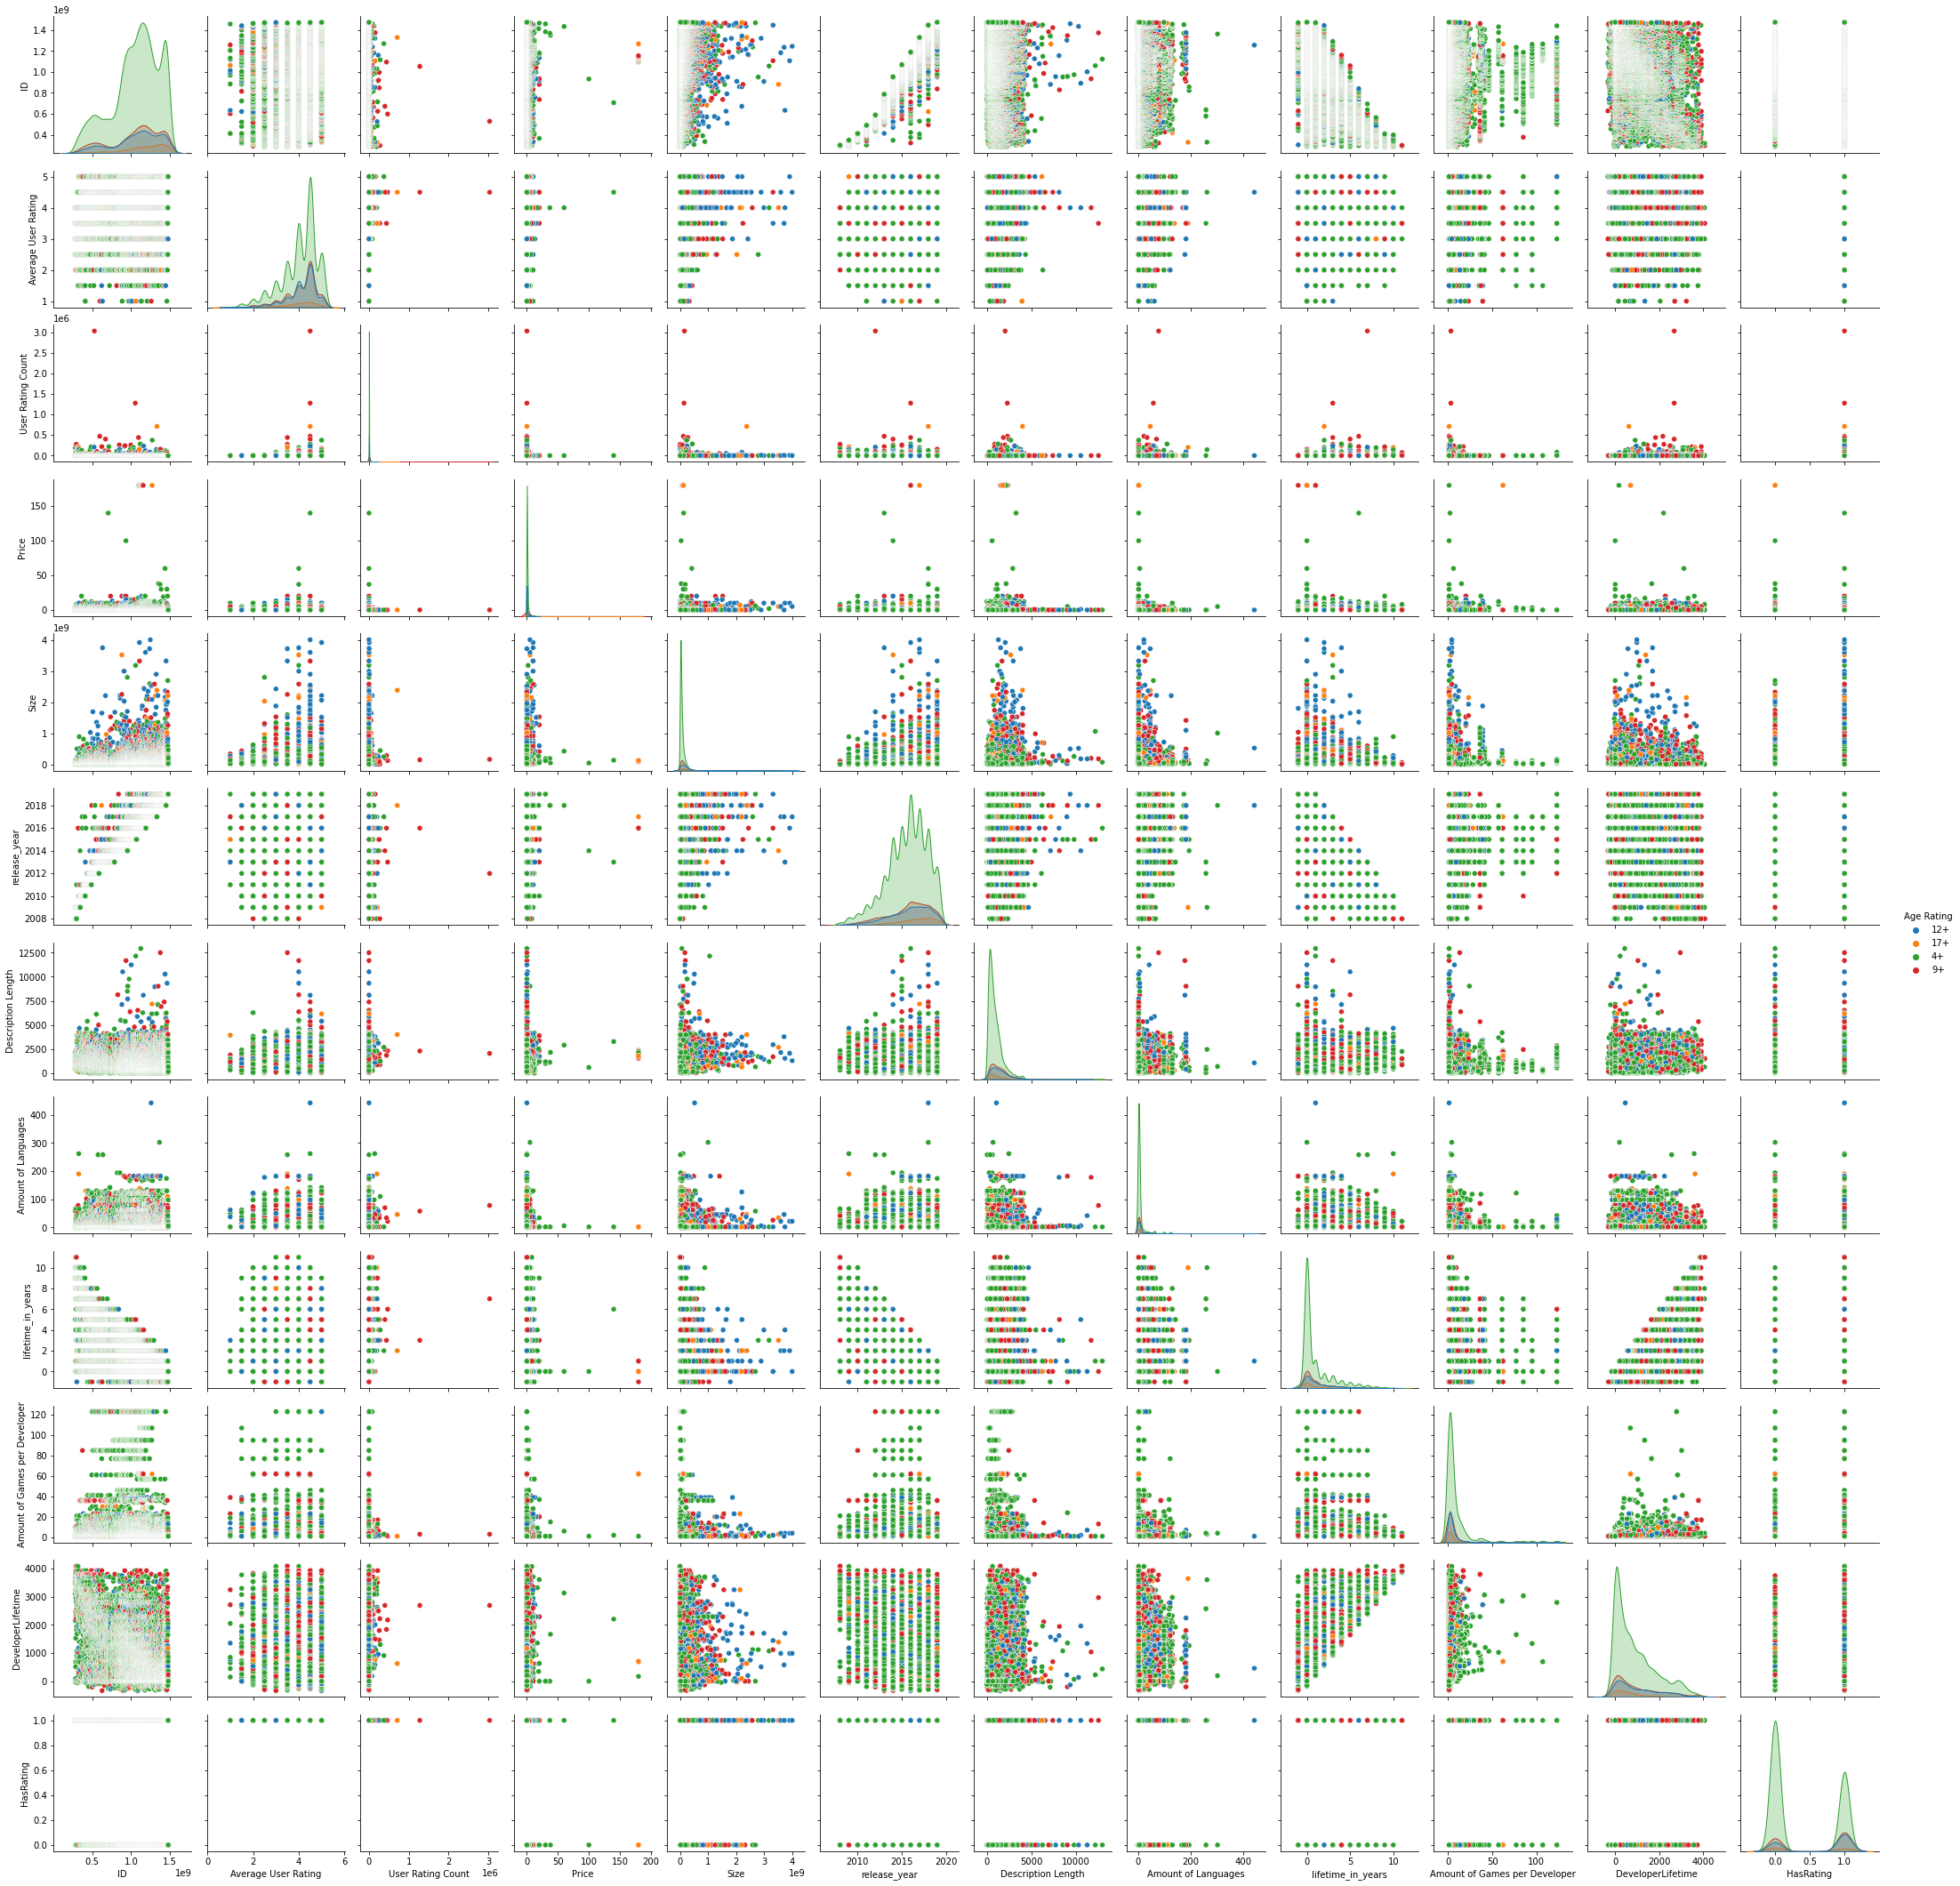

In [210]:
normalizedData = game_data.copy()
normalizedData = normalizedData[["Average User Rating","User Rating Count","Price","Size"]]
normalizedData = (normalizedData - normalizedData.min()) / (normalizedData.max() - normalizedData.min())
normalizedData["Age Rating"] = game_data["Age Rating"]

sns.pairplot(game_data, hue="Age Rating")

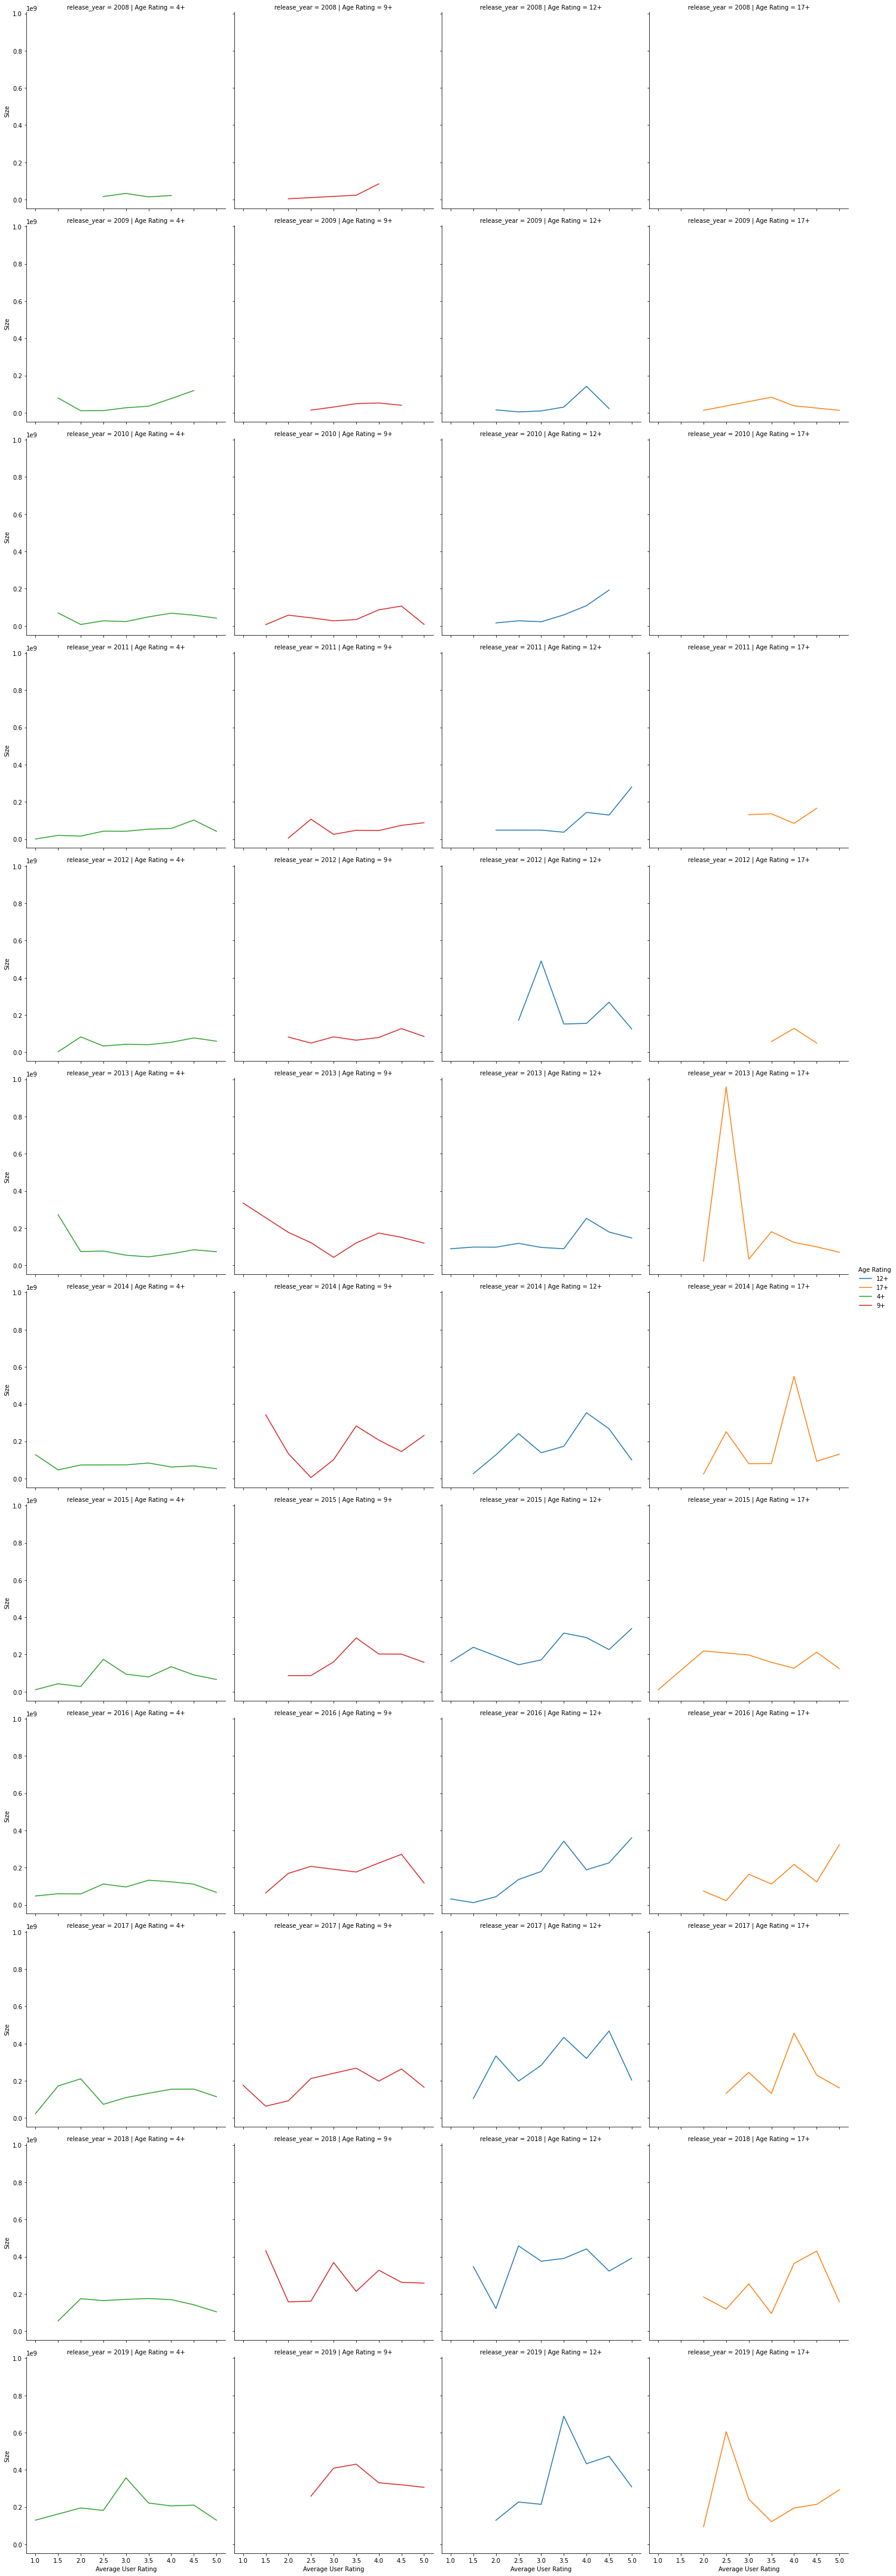

In [40]:
sns.relplot(y='Size',x='Average User Rating', data = game_data, 
            col = 'Age Rating', col_order=["4+","9+","12+","17+"],
            kind='line', 
            hue='Age Rating', 
            ci=None,
            row='release_year')

<AxesSubplot:>

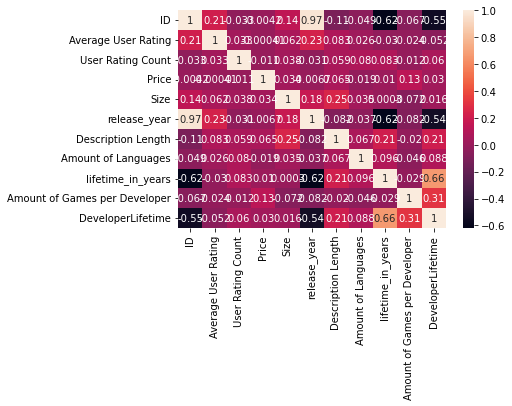

In [193]:
sns.heatmap(game_data.corr(), annot = True)

# Modeling

#### Groeperen en gemiddelde berekenen

[Text(0.5, 0, 'Release Year'), Text(0, 0.5, 'Average Price')]

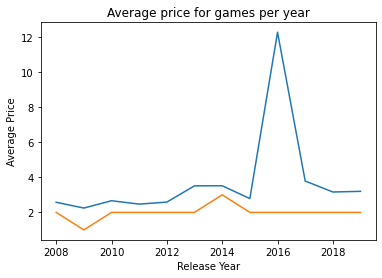

In [42]:
grouped = game_data[game_data["Price"] > 0].set_index("release_year").sort_index().reset_index().groupby("release_year")
peryear = pd.DataFrame(grouped["Price"].mean())
peryear2 = pd.DataFrame(grouped["Price"].median())
ax = sns.lineplot(data = peryear, x = "release_year", y = "Price")
ax = sns.lineplot(data = peryear2, x = "release_year", y = "Price")
ax.set(title='Average price for games per year')
ax.set(xlabel="Release Year", ylabel = "Average Price")

[Text(0.5, 0, 'Lifetime in Years'), Text(0, 0.5, 'Average Review Rating')]

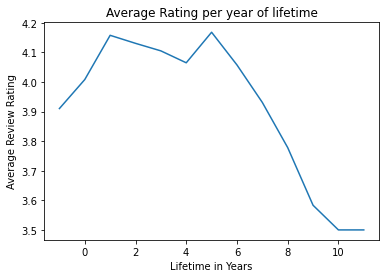

In [14]:
groupedlifetime = game_data[game_data["Average User Rating"] > 0].set_index("lifetime_in_years").sort_index().reset_index().groupby("lifetime_in_years")
pertime = pd.DataFrame(groupedlifetime["Average User Rating"].mean())
ax = sns.lineplot(data = pertime, x = "lifetime_in_years", y = "Average User Rating")
ax.set(title='Average Rating per year of lifetime')
ax.set(xlabel="Lifetime in Years", ylabel = "Average Review Rating")

In [22]:
game_data[game_data["Price"] < 100].sort_values("Price", ascending=False).head(15)

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,...,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,release_year,lifetime,lifetime_in_years
4846,https://apps.apple.com/us/app/arena-dodge/id93...,933223586,Arena Dodge,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,99.99,NaN,Contained within the Arena.\nGet millions of p...,...,4+,EN,4.286874e+07,Games,"Games, Strategy, Casual",2014-03-11,2014-03-11,2014,0 days,0
15031,https://apps.apple.com/us/app/goto-bridge-19/i...,1434393509,GOTO Bridge 19,The must-have bridge game,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,4.0,50.0,59.99,NaN,"Discover the 19th edition of GOTO Bridge, the ...",...,4+,"EN, FR",4.225659e+08,Games,"Games, Strategy, Card",2018-10-13,2018-11-15,2018,33 days,0
13730,https://apps.apple.com/us/app/blindfold-studen...,1350423680,Blindfold Student Pack 1,Navigation Skills,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,37.99,NaN,"""Blindfold Student Pack 1: Navigation skills i...",...,4+,EN,4.631654e+07,Education,"Education, Strategy, Board, Games",2018-02-22,2018-02-24,2018,2 days,0
14093,https://apps.apple.com/us/app/chess-openings-w...,1370631887,Chess Openings Wizard,Build 43 companion app,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,4.0,9.0,36.99,NaN,"""Chess Openings Wizard is where tournament pla...",...,4+,EN,1.881170e+08,Education,"Education, Board, Strategy, Games",2018-12-22,2018-12-22,2018,0 days,0
14281,https://apps.apple.com/us/app/strong-mind-esti...,1383404371,Strong Mind Estimator!,Refine your estimation skills!,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,29.99,NaN,Strong Mind Estimator presents mathematical pu...,...,4+,EN,1.844285e+08,Education,"Education, Strategy, Games, Puzzle",2019-06-04,2019-06-04,2019,0 days,0
16421,https://apps.apple.com/us/app/maze-jam/id14588...,1458832763,Maze Jam,Jam Packed with Mazes,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,29.99,NaN,"Play artistically handcrafted, unusually brill...",...,4+,EN,1.187584e+08,Education,"Education, Puzzle, Games, Strategy",2019-04-17,2019-04-17,2019,0 days,0
2863,https://apps.apple.com/us/app/panzer-corps/id7...,736781904,Panzer Corps,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,4.5,249.0,19.99,"14.99, 59.99, 9.99, 14.99, 4.99, 14.99, 4.99, ...",Panzer Corps has been hailed as the \u201cthe ...,...,9+,EN,1.526937e+09,Games,"Games, Board, Strategy, Reference",2013-12-18,2016-08-12,2013,968 days,3
276,https://apps.apple.com/us/app/smartgo-kifu/id3...,364854741,SmartGo Kifu,The premier tool to study Go,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,4.5,227.0,19.99,NaN,"""SmartGo Kifu transforms your iPad into a Go b...",...,4+,"EN, FR, DE, JA, KO, RU, ZH, ES, ZH",6.420787e+07,Games,"Games, Strategy, Board, Entertainment",2010-01-04,2019-04-17,2010,3390 days,9
4609,https://apps.apple.com/us/app/battle-academy-2...,917359165,Battle Academy 2: Eastern Front,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,4.0,83.0,19.99,9.99,This is a 32 bit app. You will always be able ...,...,12+,EN,5.954601e+08,Games,"Games, Reference, Board, Strategy",2014-10-23,2015-02-04,2014,104 days,0
9162,https://apps.apple.com/us/app/spaceship-fighti...,1134849539,Spaceship Fighting Battle Wars 3D Full,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,19.99,NaN,"Join space battles, shoot the enemies, collect...",...,12+,EN,1.046303e+08,Games,"Games, Casual, Strategy",2016-02-09,2016-02-09,2016,0 days,0


## Scraper Test

In [16]:
from itunes_app_scraper.scraper import AppStoreScraper
import pandas as pd

In [17]:
scraper = AppStoreScraper()

In [18]:
app_store_list = list(scraper.get_multiple_app_details([1318382054]))

https://itunes.apple.com/lookup?id=1318382054&country=nl&entity=software


In [19]:
df = pd.DataFrame(app_store_list)

In [21]:
df.columns

Index(['ipadScreenshotUrls', 'appletvScreenshotUrls', 'artworkUrl60',
       'artworkUrl512', 'artworkUrl100', 'artistViewUrl', 'screenshotUrls',
       'features', 'supportedDevices', 'advisories', 'isGameCenterEnabled',
       'kind', 'minimumOsVersion', 'trackCensoredName', 'languageCodesISO2A',
       'fileSizeBytes', 'sellerUrl', 'formattedPrice', 'contentAdvisoryRating',
       'averageUserRatingForCurrentVersion',
       'userRatingCountForCurrentVersion', 'averageUserRating', 'trackViewUrl',
       'trackContentRating', 'bundleId', 'releaseDate', 'primaryGenreName',
       'genreIds', 'isVppDeviceBasedLicensingEnabled', 'trackId', 'trackName',
       'sellerName', 'currentVersionReleaseDate', 'releaseNotes',
       'primaryGenreId', 'currency', 'version', 'wrapperType', 'artistId',
       'artistName', 'genres', 'price', 'description', 'userRatingCount'],
      dtype='object')